In [17]:
import numpy as np
import pandas as pd
import sklearn

docs = pd.read_csv('movie_review_train.csv') 
docs_test = pd.read_csv('movie_review_test.csv') 
#classifier in column 1, text in column 2.
docs.head()
docs_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
class    400 non-null object
text     400 non-null object
dtypes: object(2)
memory usage: 6.3+ KB


In [19]:
# counting Neg and Pos counts
# df.column_name.value_counts() - gives no. of unique inputs in the columns

counts=docs['class'].value_counts()
counts

Neg    800
Pos    800
Name: class, dtype: int64

In [20]:
# mapping labels to 0 and 1
docs['label'] = docs['class'].map({'Neg':0, 'Pos':1})
docs_test['label'] = docs_test['class'].map({'Neg':0, 'Pos':1})

In [21]:
docs.head()

,class,text,label
0,Pos,a common complaint amongst film critics is ...,1
1,Pos,whew this film oozes energy the kind of b...,1
2,Pos,steven spielberg s amistad which is bas...,1
3,Pos,he has spent his entire life in an awful litt...,1
4,Pos,being that it is a foreign language film with...,1


In [22]:
X_train = docs.text
y_train = docs.label
X_test = docs_test.text
y_test = docs_test.label
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600,)
(1600,)
(400,)
(400,)


In [23]:
X_train.head()

0     a common complaint amongst film critics is   ...
1     whew   this film oozes energy   the kind of b...
2     steven spielberg s   amistad     which is bas...
3     he has spent his entire life in an awful litt...
4     being that it is a foreign language film with...
Name: text, dtype: object

In [57]:
# vectorizing the sentences; removing stop words
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words='english',min_df=.03,max_df=.8)

In [58]:
v = vect.fit(X_train)
# X_train_dtm = vect.transform(X_train)

In [104]:
# printing the vocabulary
v = vect.vocabulary_
len(vect.vocabulary_.values())
print(vect)
print(list(v)[50])
print(list(v)[len(v) - 51])
features = vect.get_feature_names()
print(features[49])
print(features[len(features)-50])
l1 = features[::-1]
print(l1[49])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=0.03,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)
gone
convinced
albeit
wide
wide


In [96]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed =vect.transform(X_test)

In [131]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba =mnb.predict_proba(X_test_transformed)


# printing the overall accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

sum(mnb.feature_count_[1])
sum(mnb.feature_count_[0])
features.index('stupid')
mnb.feature_count_[0][features.index('stupid')]
print(mnb.feature_count_[1][features.index('painfully')])
print(sum(mnb.feature_count_[1]))


n1 = mnb.feature_count_[0]/sum(mnb.feature_count_[0])
n2 = mnb.feature_count_[1]/sum(mnb.feature_count_[1])
n3 = n1/n2 
print(n3)
print(max(n3))
print(list(n3).index(max(n3)))
featurs(1)

10.0
153000.0
[1.20276909 0.90464684 1.11024839 ... 1.07196396 0.78965995 0.5551242 ]
6.735506904583947
1575


In [98]:
# note that alpha=1 is used by default for smoothing
mnb

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [99]:
# confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[172,  28],
       [ 41, 159]])

In [101]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[172  28]
 [ 41 159]]


In [33]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.78


In [34]:
specificity = TN / float(TN + FP)

print("specificity",specificity)

specificity 0.81


In [35]:
precision = TP / float(TP + FP)

print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8041237113402062
0.8041237113402062


In [36]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8041237113402062
PRECISION SCORE : 0.8041237113402062
RECALL SCORE : 0.78
F1 SCORE : 0.7918781725888325


In [37]:
y_pred_class

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [38]:
y_pred_proba

array([[9.99815544e-01, 1.84456400e-04],
       [1.80431723e-08, 9.99999982e-01],
       [2.93597323e-04, 9.99706403e-01],
       [1.37891062e-22, 1.00000000e+00],
       [9.99992587e-01, 7.41255840e-06],
       [2.52436000e-40, 1.00000000e+00],
       [3.31873454e-38, 1.00000000e+00],
       [1.62120574e-04, 9.99837879e-01],
       [5.64657141e-04, 9.99435343e-01],
       [2.27934669e-17, 1.00000000e+00],
       [6.45031025e-11, 1.00000000e+00],
       [3.30466641e-16, 1.00000000e+00],
       [3.56839515e-15, 1.00000000e+00],
       [1.01922028e-19, 1.00000000e+00],
       [4.52327526e-07, 9.99999548e-01],
       [7.43064598e-09, 9.99999993e-01],
       [3.80502907e-04, 9.99619497e-01],
       [6.69381494e-24, 1.00000000e+00],
       [3.16041572e-07, 9.99999684e-01],
       [9.99998734e-01, 1.26589019e-06],
       [1.21615068e-04, 9.99878385e-01],
       [1.56937693e-04, 9.99843062e-01],
       [1.00000000e+00, 1.86510166e-10],
       [1.58722898e-31, 1.00000000e+00],
       [3.260045

In [39]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [40]:
# area under the curve
print (roc_auc)

0.8668375


In [41]:
print(true_positive_rate)

[0.    0.42  0.42  0.42  0.43  0.43  0.44  0.445 0.445 0.45  0.45  0.485
 0.485 0.505 0.505 0.535 0.535 0.57  0.57  0.575 0.575 0.585 0.585 0.65
 0.65  0.67  0.67  0.69  0.69  0.7   0.7   0.735 0.735 0.755 0.755 0.76
 0.76  0.765 0.765 0.77  0.77  0.775 0.775 0.78  0.78  0.785 0.785 0.795
 0.795 0.8   0.8   0.815 0.815 0.83  0.83  0.84  0.84  0.845 0.845 0.855
 0.855 0.86  0.86  0.865 0.865 0.87  0.87  0.875 0.875 0.88  0.88  0.905
 0.905 0.915 0.915 0.92  0.92  0.925 0.925 0.94  0.94  0.945 0.945 0.95
 0.95  0.955 0.955 0.96  0.96  0.965 0.965 0.97  0.97  0.98  0.98  0.985
 0.985 0.99  0.99  0.995 0.995 1.    1.   ]


In [42]:
print(false_positive_rate)

[0.    0.02  0.03  0.04  0.04  0.045 0.045 0.05  0.055 0.055 0.06  0.06
 0.065 0.065 0.07  0.07  0.075 0.075 0.08  0.08  0.085 0.085 0.09  0.09
 0.095 0.095 0.1   0.1   0.105 0.105 0.11  0.11  0.13  0.13  0.15  0.15
 0.155 0.155 0.16  0.16  0.185 0.185 0.19  0.19  0.215 0.215 0.23  0.23
 0.24  0.24  0.255 0.255 0.29  0.29  0.305 0.305 0.33  0.33  0.335 0.335
 0.355 0.355 0.375 0.375 0.38  0.38  0.395 0.395 0.4   0.4   0.42  0.42
 0.43  0.43  0.44  0.44  0.45  0.45  0.455 0.455 0.46  0.46  0.48  0.48
 0.485 0.485 0.555 0.555 0.6   0.6   0.695 0.695 0.735 0.735 0.75  0.75
 0.785 0.785 0.86  0.86  0.935 0.935 1.   ]


In [43]:
print(thresholds)

[2.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 9.99999999e-01 9.99999999e-01 9.99999995e-01
 9.99999995e-01 9.99999982e-01 9.99999980e-01 9.99999976e-01
 9.99999976e-01 9.99999964e-01 9.99999938e-01 9.99993154e-01
 9.99991114e-01 9.99945959e-01 9.99914106e-01 9.99837879e-01
 9.99837489e-01 9.99822747e-01 9.99802808e-01 9.99172077e-01
 9.98437867e-01 9.94575341e-01 9.75566667e-01 9.71214922e-01
 9.61262147e-01 9.37078878e-01 8.52117264e-01 8.38017746e-01
 6.53662560e-01 6.33909667e-01 6.21198197e-01 6.07954770e-01
 3.32135906e-01 2.09056194e-01 1.44278211e-01 5.29496331e-02
 3.65580488e-02 3.51606401e-02 1.99875092e-02 1.41694803e-02
 2.82617785e-03 1.91897133e-03 8.84052053e-04 7.07384794e-04
 1.86503445e-04 1.84456400e-04 1.37313056e-04 1.09330964e-04
 4.29996477e-05 3.16179970e-05 8.53823474e-06 7.41255840e-06
 7.01802408e-06 6.128465

In [44]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds, 
              'TPR': true_positive_rate, 
              'FPR':false_positive_rate
             })

,FPR,TPR,Threshold
0,0.000,0.000,2.000000e+00
1,0.020,0.420,1.000000e+00
2,0.030,0.420,1.000000e+00
3,0.040,0.420,1.000000e+00
4,0.040,0.430,1.000000e+00
5,0.045,0.430,1.000000e+00
6,0.045,0.440,1.000000e+00
7,0.050,0.445,1.000000e+00
8,0.055,0.445,1.000000e+00
9,0.055,0.450,1.000000e+00


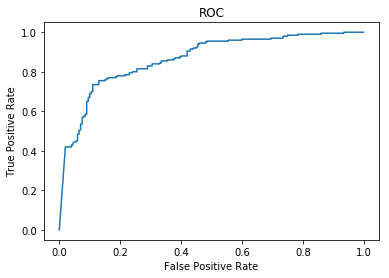

In [45]:
# plotting the ROC curve

%matplotlib inline  
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)